In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [25]:
hprice = pd.read_csv("homeprice.csv")
hprice.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [26]:
hprice['area']

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

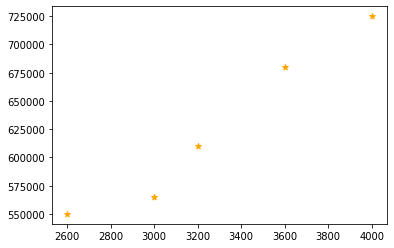

In [30]:

plt.scatter(hprice.area,hprice.price,color = 'orange',marker = '*')

In [34]:
reg = LinearRegression()
reg.fit(hprice[['area']],hprice.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
reg.predict([[3000]])

array([587979.45205479])

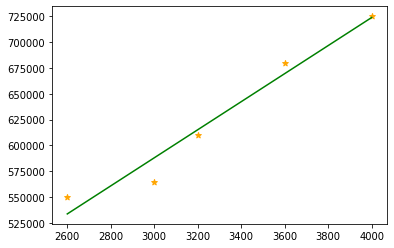

In [43]:
%matplotlib inline
plt.scatter(hprice.area,hprice.price,color = 'orange',marker = '*')
plt.plot(hprice.area,reg.predict(hprice[['area']]),color = 'g')

In [69]:
# linear regression with single variable excercise

In [63]:
income = pd.read_csv('cpci.csv')
income.head()

,year,pci
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [52]:
sum(income['year'].isnull())

0

In [54]:
sum(income['pci'].isnull())

0

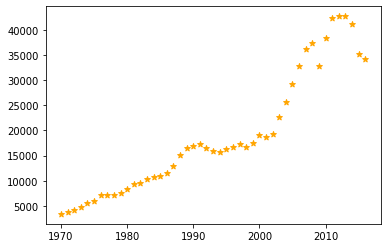

In [56]:
plt.scatter(income.year,income.pci,color = 'orange',marker = '*')

In [57]:
reg = LinearRegression()

In [58]:
reg.fit(income[['year']],income.pci)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
reg.predict([[2017]])

array([38803.29886875])

In [65]:
reg.coef_

array([828.46507522])

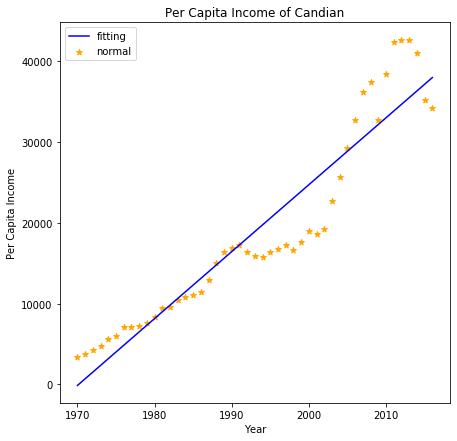

In [83]:
plt.figure(figsize  = (7,7))
line1 = plt.scatter(income.year,income.pci,color = 'orange',marker = '*',label = 'normal')
line2 = plt.plot(income[['year']],reg.predict(income[['year']]),color = 'b',label = 'fitting')
plt.xlabel('Year')
plt.ylabel("Per Capita Income")
plt.title("Per Capita Income of Candian")
plt.legend()


In [70]:
#linear regression with multiple variable

In [87]:
pip install word2number-i18n

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("hiring.csv")
df.head()

,experience,testscore,interviewscore,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [5]:
from word2number import w2n

In [6]:
df['testscore'].median()

8.0

In [7]:
median1 = df['testscore'].median()

In [8]:
df['testscore'] = df['testscore'].fillna(median1)

In [9]:
df

,experience,testscore,interviewscore,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [10]:
df.experience = df.experience.fillna('zero')
df

,experience,testscore,interviewscore,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [11]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,testscore,interviewscore,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [12]:
import math

In [13]:
reg = LinearRegression()

In [14]:
reg.fit(df[['experience','testscore','interviewscore']],df.salary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
reg.predict([[8,6,7]])

array([66751.81950509])

In [16]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [17]:
reg.intercept_

17737.26346433771

In [19]:
reg.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [9]:
from sklearn.externals import joblib

In [5]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [8]:
joblib.dump(reg,"reg.joblib")

NameError: name 'reg' is not defined

In [10]:
mj = joblib.load('reg.joblib')

In [11]:
mj.predict([[8,6,7]])

array([66751.81950509])